In [54]:
import numpy as np
import matplotlib.pyplot as plt
from neurodsp.spectral import compute_spectrum
from neurodsp.plts.spectral import plot_power_spectra

**Load data**

In [2]:
subj_data_path_ec = '../data/sub-19690969_ses-1_task-restEC_eeg_csv_120.016s.npy'
eeg_dict_ec = np.load(subj_data_path_ec, allow_pickle=True)
channel_labels_ec = eeg_dict_ec['labels']
sampling_freq_ec = eeg_dict_ec['Fs']
eeg_data_ec = eeg_dict_ec['data']

In [3]:
print("Data shape:", eeg_data_ec.shape)
print("Sampling frequency:", sampling_freq_ec)
print("Num channels:", len(channel_labels_ec))
print("Channel labels:", channel_labels_ec)

Data shape: (1, 32, 60008)
Sampling frequency: 500
Num channels: 32
Channel labels: ['Fp1' 'Fp2' 'F7' 'F3' 'Fz' 'F4' 'F8' 'FC3' 'FCz' 'FC4' 'T7' 'C3' 'Cz'
 'C4' 'T8' 'CP3' 'CPz' 'CP4' 'P7' 'P3' 'Pz' 'P4' 'P8' 'O1' 'Oz' 'O2'
 'artifacts' 'VEOG' 'HEOG' 'Erbs' 'OrbOcc' 'Mass']


In [21]:
subj_data_path_eo = '../data/sub-19690969_ses-1_task-restEO_eeg_csv_119.92s.npy'
eeg_dict_eo = np.load(subj_data_path_eo, allow_pickle=True)
print(eeg_dict_eo.keys())
channel_labels_eo = eeg_dict_eo['labels']
sampling_freq_eo = eeg_dict_eo['Fs']
eeg_data_eo = eeg_dict_eo['data']

dict_keys(['artifacts', 'info', 'data', 'trl', 'artidata', 'arttrl', 'Fs', 'labels', 'neighblabels'])


In [5]:
print("Data shape:", eeg_data_eo.shape)
print("Sampling frequency:", sampling_freq_eo)
print("Num channels:", len(channel_labels_eo))
print("Channel labels:", channel_labels_eo)

Data shape: (1, 32, 59960)
Sampling frequency: 500
Num channels: 32
Channel labels: ['Fp1' 'Fp2' 'F7' 'F3' 'Fz' 'F4' 'F8' 'FC3' 'FCz' 'FC4' 'T7' 'C3' 'Cz'
 'C4' 'T8' 'CP3' 'CPz' 'CP4' 'P7' 'P3' 'Pz' 'P4' 'P8' 'O1' 'Oz' 'O2'
 'artifacts' 'VEOG' 'HEOG' 'Erbs' 'OrbOcc' 'Mass']


**Plot raw data**

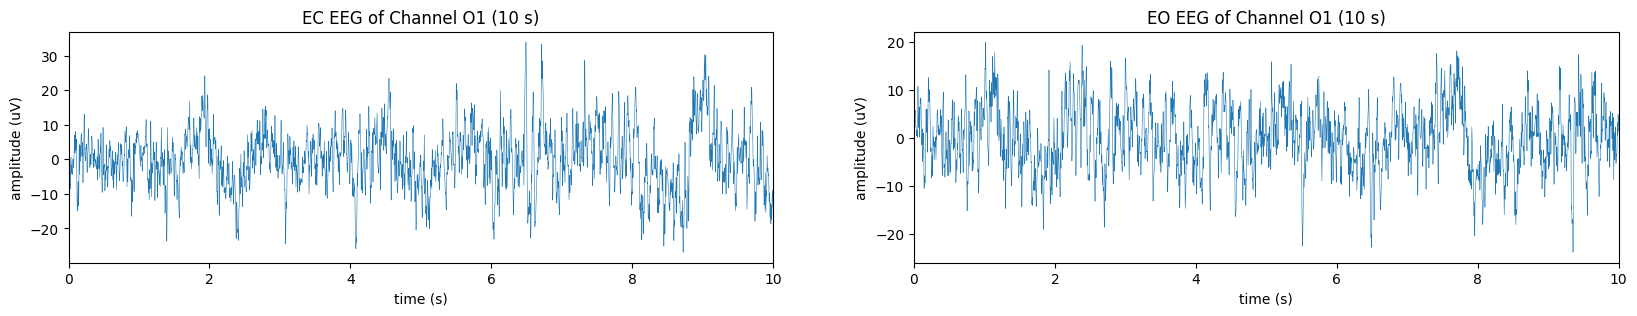

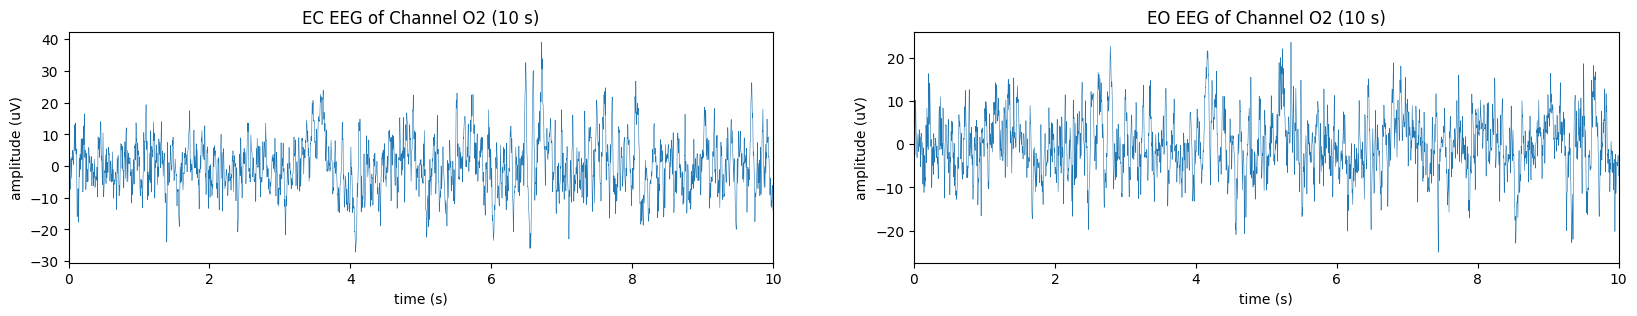

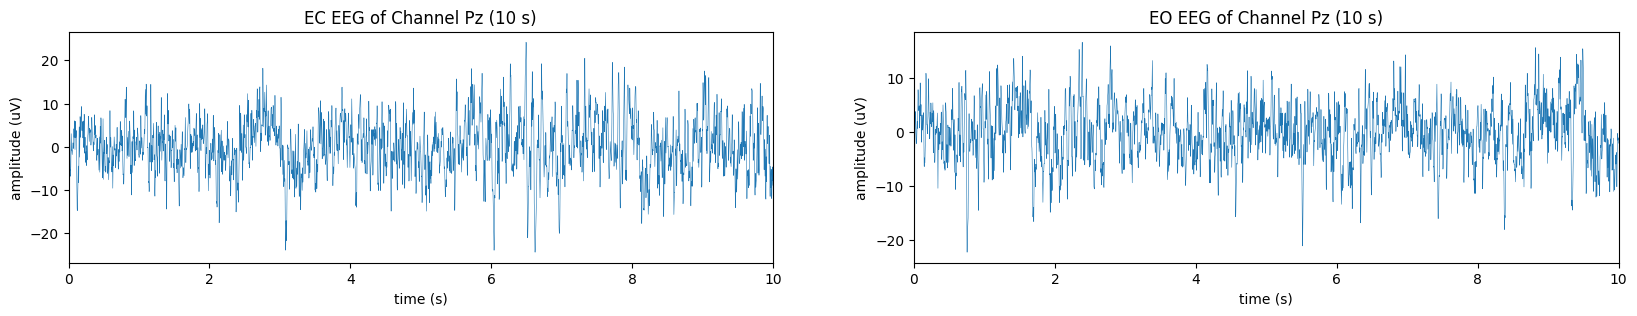

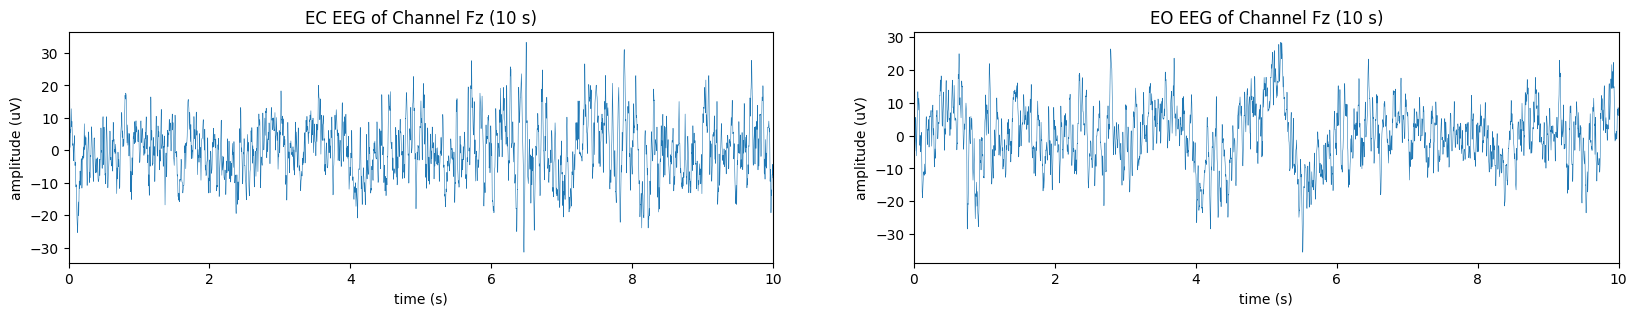

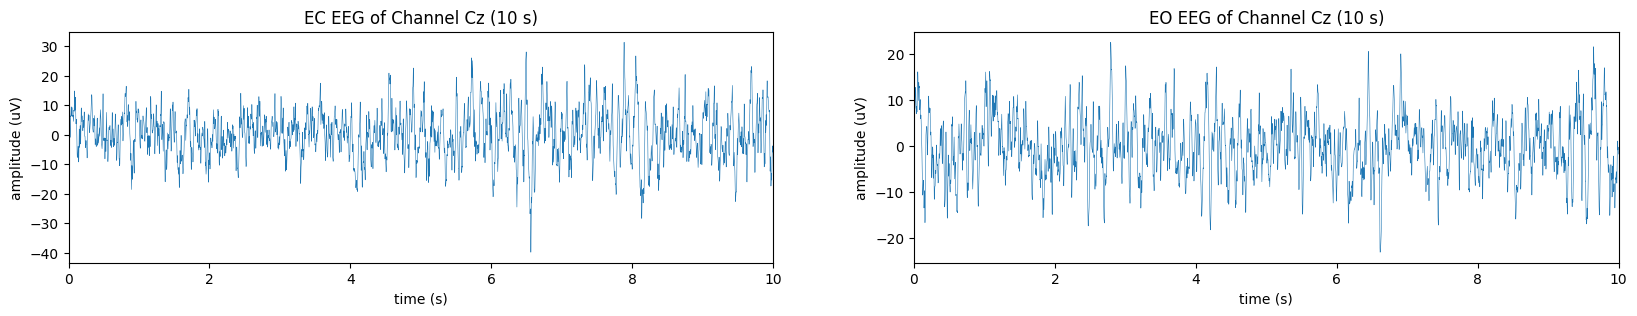

In [93]:
# --- plot raw EEG data (first 10s) ---
# ec
eeg_data_ec = np.squeeze(eeg_data_ec)
# print(eeg_data_ec.shape)
n_channels, n_times = eeg_data_ec.shape
time_ec = np.arange(n_times) / sampling_freq_ec
# print(time_ec)

# eo
eeg_data_eo = np.squeeze(eeg_data_eo)
n_channels, n_times = eeg_data_eo.shape
time_eo = np.arange(n_times) / sampling_freq_eo

# example channels
ex_channels = ['O1', 'O2', 'Pz', 'Fz', 'Cz']

t = 10 # 10 seconds
time_pts = t*sampling_freq_ec 

for i in range(len(example_channels)):
    plt.figure(figsize=(20, 3))
    # ec
    plt.subplot(1,2,1)
    plt.plot(time_ec[:time_pts], eeg_data_ec[i,:time_pts], linewidth=0.4)
    plt.xlabel("time (s)")
    plt.ylabel("amplitude (uV)")
    plt.xlim(0,t)
    plt.title(f"EC EEG of Channel {ex_channels[i]} ({int(t)} s)")

    # eo
    plt.subplot(1,2,2)
    plt.plot(time_eo[:time_pts], eeg_data_eo[i,:time_pts], linewidth=0.4)
    plt.xlabel("time (s)")
    plt.ylabel("amplitude (uV)")
    plt.xlim(0,t)
    plt.title(f"EO EEG of Channel {ex_channels[i]} ({int(t)} s)")

    plt.show()

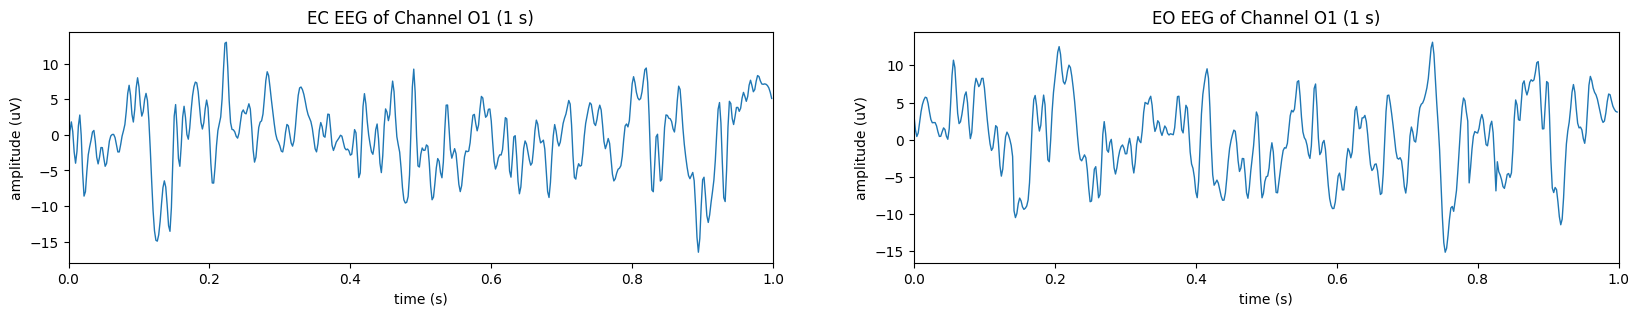

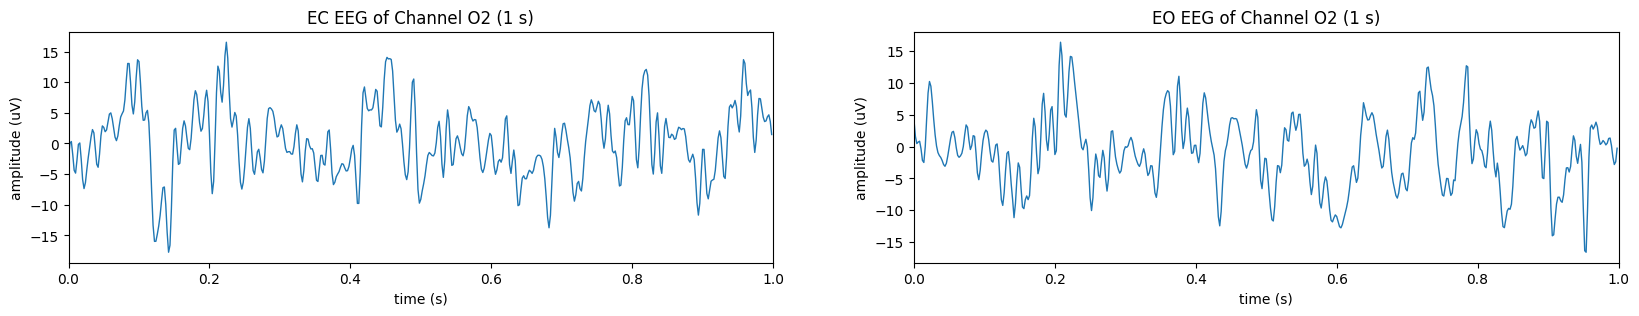

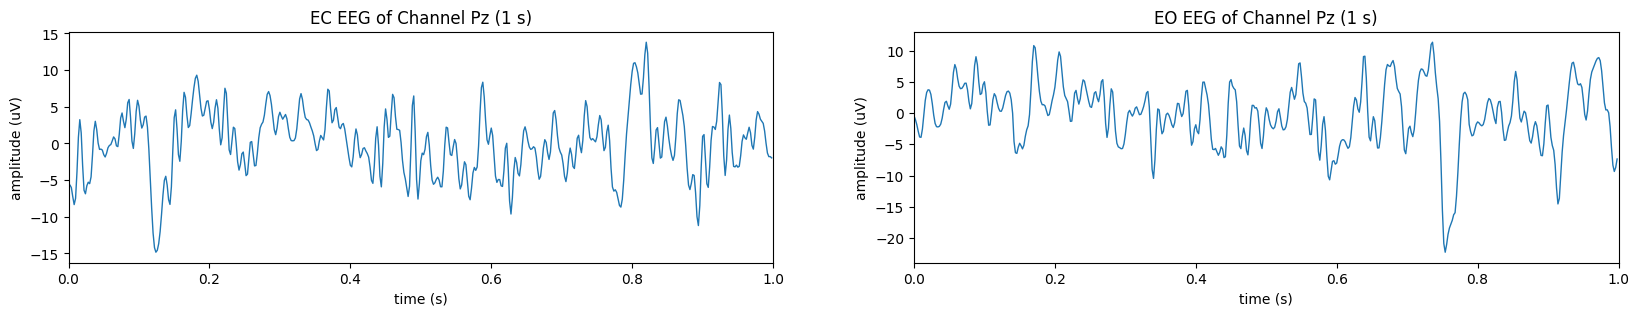

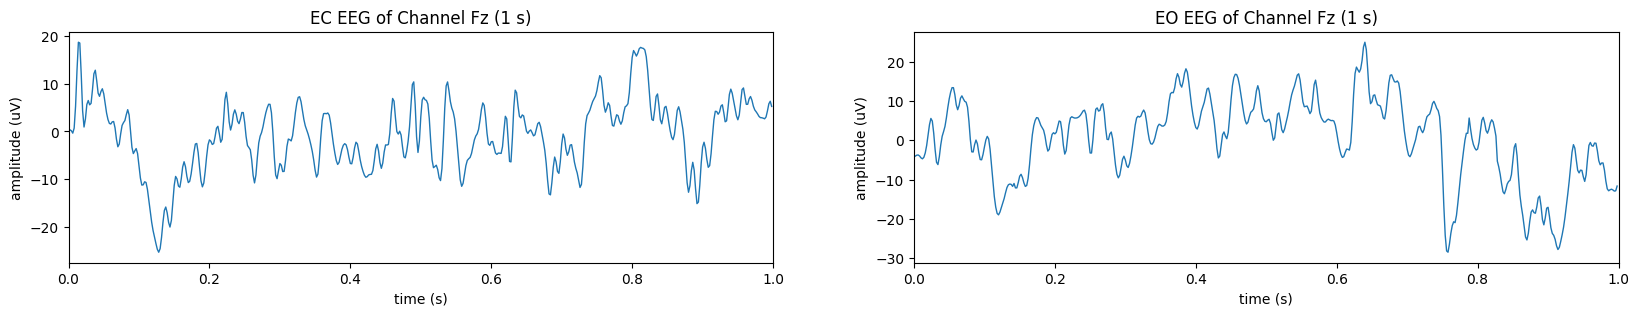

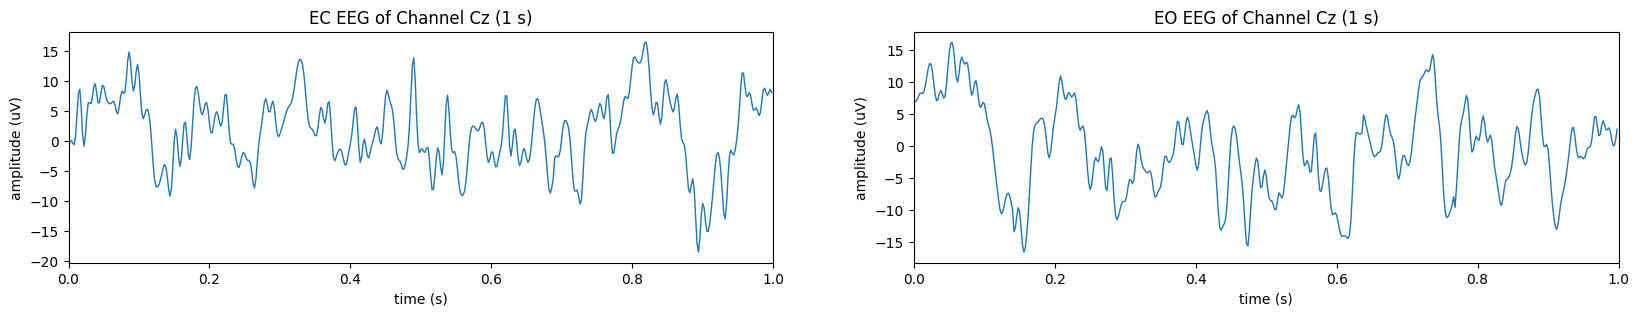

In [105]:
# --- plot raw EEG data (first 1s) (trying to find alpha oscillation) ---
# ec
eeg_data_ec = np.squeeze(eeg_data_ec)
# print(eeg_data_ec.shape)
n_channels, n_times = eeg_data_ec.shape
time_ec = np.arange(n_times) / sampling_freq_ec
# print(time_ec)

# eo
eeg_data_eo = np.squeeze(eeg_data_eo)
n_channels, n_times = eeg_data_eo.shape
time_eo = np.arange(n_times) / sampling_freq_eo

# example channels
ex_channels = ['O1', 'O2', 'Pz', 'Fz', 'Cz']

t = 1 # 1 seconds
time_pts = t*sampling_freq_ec 

for i in range(len(example_channels)):
    plt.figure(figsize=(20, 3))
    # ec
    plt.subplot(1,2,1)
    plt.plot(time_ec[:time_pts], eeg_data_ec[i,:time_pts], linewidth=1)
    plt.xlabel("time (s)")
    plt.ylabel("amplitude (uV)")
    plt.xlim(0,t)
    plt.title(f"EC EEG of Channel {ex_channels[i]} ({int(t)} s)")

    # eo
    plt.subplot(1,2,2)
    plt.plot(time_eo[:time_pts], eeg_data_eo[i,:time_pts], linewidth=1)
    plt.xlabel("time (s)")
    plt.ylabel("amplitude (uV)")
    plt.xlim(0,t)
    plt.title(f"EO EEG of Channel {ex_channels[i]} ({int(t)} s)")

    plt.show()

**Plot PSD**

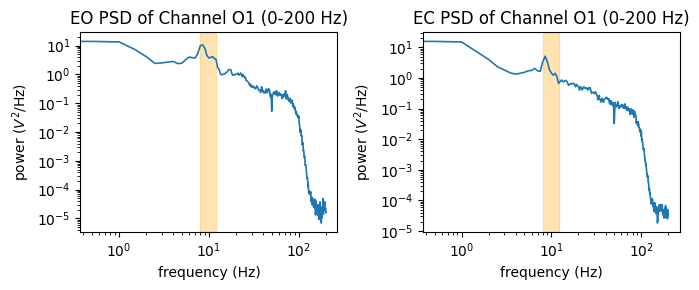

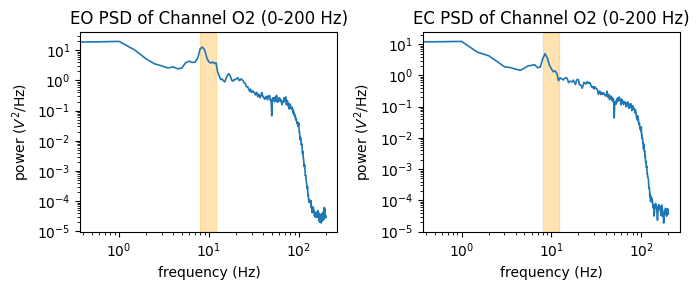

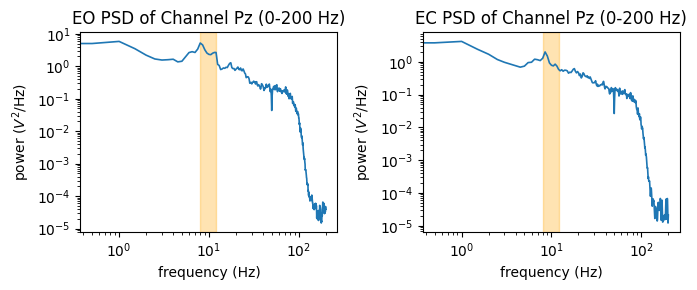

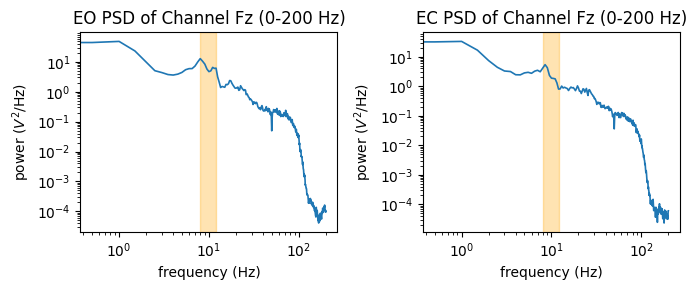

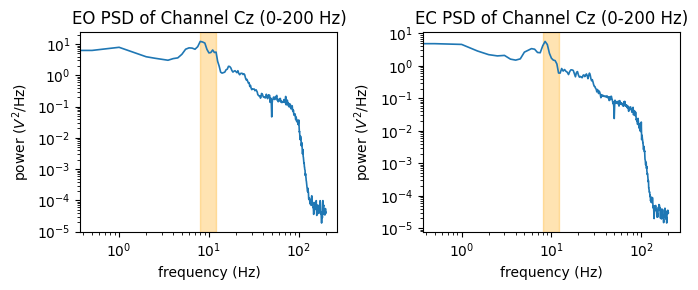

In [103]:
# --- plot psd (range 0-200 Hz) ---
for i in range(len(example_channels)):
    plt.figure(figsize=(7, 3))

    # ec
    freq_mean_ec, psd_mean_ec = compute_spectrum(eeg_data_ec[i,:], sampling_freq_ec, method='welch', avg_type='mean', nperseg=sampling_freq_ec*2)
    freq_limit = np.argmax(freq_mean_ec > 200)
    # plot_power_spectra(freq_mean_ec, psd_mean_ec, f'Channel {example_channels[i]}')
    plt.subplot(1,2,1)
    plt.loglog(freq_mean_ec[:freq_limit], psd_mean_ec[:freq_limit], linewidth=1.2)
    plt.xlabel("frequency (Hz)")
    plt.ylabel("power ($V^2$/Hz)")
    plt.title(f"EO PSD of Channel {ex_channels[i]} (0-200 Hz)")
    plt.axvspan(8, 12, color='orange', alpha=0.3, label='Alpha (8-12 Hz)') # highlight alpha band (8-12 Hz)

    # eo
    freq_mean_eo, psd_mean_eo = compute_spectrum(eeg_data_eo[i,:], sampling_freq_eo, method='welch', avg_type='mean', nperseg=sampling_freq_eo*2)
    freq_limit = np.argmax(freq_mean_eo > 200)

    plt.subplot(1,2,2)
    plt.loglog(freq_mean_eo[:freq_limit], psd_mean_eo[:freq_limit], linewidth=1.2)
    plt.xlabel("frequency (Hz)")
    plt.ylabel("power ($V^2$/Hz)")
    plt.title(f"EC PSD of Channel {ex_channels[i]} (0-200 Hz)")
    plt.axvspan(8, 12, color='orange', alpha=0.3, label='Alpha (8-12 Hz)') # highlight alpha band (8-12 Hz)


    plt.tight_layout()
    plt.show()

**Quantify alpha power**

In [117]:
alpha_band = (8, 12)

# EC alpha
idx_alpha_ec = (freq_mean_ec >= alpha_band[0]) & (freq_mean_ec <= alpha_band[1])
freq_alpha_ec = freq_mean_ec[idx_alpha_ec]
print("Number of freq points between 8 and 12 Hz:", freq_alpha_ec.shape[0])
psd_alpha_ec  = psd_mean_ec[idx_alpha_ec]
alpha_power_ec = np.trapezoid(psd_alpha_ec, freq_alpha_ec) # integrate

# EO alpha
idx_alpha_eo = (freq_mean_eo >= alpha_band[0]) & (freq_mean_eo <= alpha_band[1])
freq_alpha_eo = freq_mean_eo[idx_alpha_eo]
psd_alpha_eo  = psd_mean_eo[idx_alpha_eo]
alpha_power_eo = np.trapezoid(psd_alpha_eo, freq_alpha_eo)

print(f"Alpha power EC: {alpha_power_ec:.4f} V²")
print(f"Alpha power EO: {alpha_power_eo:.4f} V²")

Number of freq points between 8 and 12 Hz: 9
Alpha power EC: 30.2784 V²
Alpha power EO: 10.4722 V²
